# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [2]:
import pandas as pd
import numpy as np
!pip install folium
import folium


     |████████████████████████████████| 94 kB 4.1 MB/s  eta 0:00:01


In [5]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv('../../DATA/train_cleaned.csv')
X.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan
0,0,0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,...,0,0,0,0,0,0.640487,queens,queens,0,0
1,1,1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,...,0,0,0,0,0,5.250670,manhattan,manhattan,1,0
2,2,2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,...,0,0,0,0,0,0.863411,manhattan,manhattan,0,0
3,3,3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,...,0,0,0,0,0,1.739386,manhattan,manhattan,1,0
4,4,4,4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,...,0,0,0,0,0,1.242218,manhattan,manhattan,0,0


In [7]:
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,...,is_dropoff_JFK,is_pickup_EWR,is_dropoff_EWR,is_pickup_la_guardia,is_dropoff_la_guardia,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,...,0,0,0,0,0,0.640487,queens,queens,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,...,0,0,0,0,0,5.250670,manhattan,manhattan,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,...,0,0,0,0,0,0.863411,manhattan,manhattan,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,...,0,0,0,0,0,1.739386,manhattan,manhattan,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,...,0,0,0,0,0,1.242218,manhattan,manhattan,0,0


In [9]:
X=pd.get_dummies(X)# one hot coding
X.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,...,0,0,1,0,0,0,0,0,1,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,...,1,0,0,0,0,0,1,0,0,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,...,1,0,0,0,0,0,1,0,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,...,1,0,0,0,0,0,1,0,0,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,...,1,0,0,0,0,0,1,0,0,0


In [10]:
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [11]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [12]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation


In [35]:
X_test = X[X['pickup_year']==2015]
X_train = X[(X['pickup_year'] > 2008) & (X['pickup_year'] < 2015)]
y_test = y[X['pickup_year']==2015]
y_train = y[(X['pickup_year'] > 2008) & (X['pickup_year'] < 2015)]
print(np.shape(X_train),np.shape(y_train))k

(372110, 31) (372110,)


### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


In [65]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_squared_error as MSE
RFRm = RFR(max_depth=2, random_state=0)
RFRm.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data


In [92]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [109]:
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  mean_squared_error
import sklearn



parameters = {'n_estimators':[10,50,100],'max_depth':[2,5,10],'min_samples_split':[2,5,10]}

clf = GridSearchCV(ensemble.RandomForestRegressor(), parameters, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

clf.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 28.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [112]:
res = pd.DataFrame.from_dict(clf.cv_results_)

In [164]:
#res

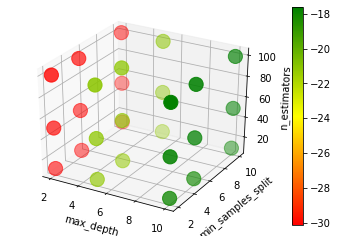

In [160]:
fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
cmap_own = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

ownplot=ax.scatter3D(list(res['param_max_depth']),list(res['param_min_samples_split']),list(res['param_n_estimators']),c=list(res['mean_test_score']),s= 200,cmap=cmap_own)
ax.set_xlabel('max_depth')
ax.set_ylabel('min_samples_split')
ax.set_zlabel('n_estimators')
plt.colorbar(ownplot)
plt.show()

***higher max depth is clearly better***

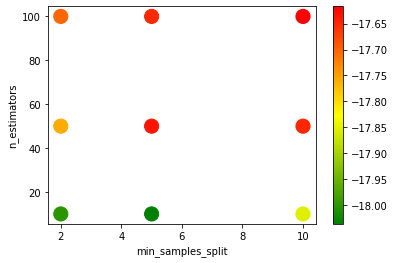

In [161]:
fig = plt.figure()
ax = fig.add_subplot()
cmap_own = matplotlib.colors.LinearSegmentedColormap.from_list("",['green','yellow','red'])

rows_best_max_depth = np.array(res['param_max_depth'])==10

ownplot=ax.scatter(np.array(res['param_min_samples_split'])[rows_best_max_depth],np.array(res['param_n_estimators'])[rows_best_max_depth],c=np.array(res['mean_test_score'])[rows_best_max_depth],s= 200,cmap=cmap_own)

ax.set_xlabel('min_samples_split')
ax.set_ylabel('n_estimators')
plt.colorbar(ownplot)
plt.show()

***more estimators and higher min_samples_split ist better***

In [162]:
clf.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

* Analyze the model error: are there typical settings where the model fails?

### test dataset hasnt been used yet. Is the clf.best_estimator overfitted? Did not found a way to access all trained models of gridsearch...

In [244]:
res = pd.DataFrame(columns=['n_estimators','max_depth','min_samples_split','mse_y_train','mse_y_test','mse_diff'])
parameters_arr=np.array(list(parameters.values()))
i=1
for es in parameters_arr[0,:]:
    for md in parameters_arr[1,:]:
        for mss in parameters_arr[2,:]:
            RFRm = RFR(n_estimators=es, max_depth=md, min_samples_split=mss)
            RFRm.fit(X_train,y_train)
            pred_y_test = RFRm.predict(X_test)
            pred_y_train = RFRm.predict(X_train)
            mse_y_test = mean_squared_error(pred_y_test,y_test)
            mse_y_train = mean_squared_error(pred_y_train,y_train)
            res_new = pd.DataFrame([[es,md,mss,mse_y_train,mse_y_test,float(mse_y_train)-float(mse_y_test)]],columns=['n_estimators','max_depth','min_samples_split','mse_y_train','mse_y_test','mse_diff'])
            res = res.append(res_new)
            print('job No. ', i , ' out of ',len(parameters_arr[:,0])*len(parameters_arr[:,1])*len(parameters_arr[:,0]) , ' finished.')
            i=i+1

job No.  1  out of  27  finished.
job No.  2  out of  27  finished.
job No.  3  out of  27  finished.
job No.  4  out of  27  finished.
job No.  5  out of  27  finished.
job No.  6  out of  27  finished.
job No.  7  out of  27  finished.
job No.  8  out of  27  finished.
job No.  9  out of  27  finished.
job No.  10  out of  27  finished.
job No.  11  out of  27  finished.
job No.  12  out of  27  finished.
job No.  13  out of  27  finished.
job No.  14  out of  27  finished.
job No.  15  out of  27  finished.
job No.  16  out of  27  finished.
job No.  17  out of  27  finished.
job No.  18  out of  27  finished.
job No.  19  out of  27  finished.
job No.  20  out of  27  finished.
job No.  21  out of  27  finished.
job No.  22  out of  27  finished.
job No.  23  out of  27  finished.
job No.  24  out of  27  finished.
job No.  25  out of  27  finished.
job No.  26  out of  27  finished.
job No.  27  out of  27  finished.


In [254]:

res

,n_estimators,max_depth,min_samples_split,mse_y_train,mse_y_test,mse_diff
0,10,2,2,30.031384,41.782932,-11.751547
0,10,2,5,30.031334,41.821130,-11.789796
0,10,2,10,29.976677,41.821143,-11.844467
0,10,5,2,20.741014,26.789390,-6.048376
0,10,5,5,20.867724,26.885910,-6.018185
0,10,5,10,20.974123,26.596726,-5.622603
0,10,10,2,14.186556,22.767277,-8.580721
0,10,10,5,14.347759,22.806271,-8.458513
0,10,10,10,14.658828,22.890181,-8.231352
0,50,2,2,29.972164,41.748242,-11.776078


In [259]:
res.sort_values(by=['mse_y_test'])


,n_estimators,max_depth,min_samples_split,mse_y_train,mse_y_test,mse_diff
0,100,10,10,14.509723,22.437108,-7.927384
0,50,10,2,13.927709,22.454380,-8.526671
0,50,10,10,14.527862,22.493625,-7.965763
0,100,10,2,13.799532,22.496658,-8.697127
0,100,10,5,14.215373,22.527204,-8.311831
0,50,10,5,14.133162,22.559397,-8.426234
0,10,10,2,14.186556,22.767277,-8.580721
0,10,10,5,14.347759,22.806271,-8.458513
0,10,10,10,14.658828,22.890181,-8.231352
0,50,5,10,20.827135,26.471749,-5.644614


In [ ]:
# the best performance on the train dataset is not the best on the test dataset. 
# But as before, the best model with the best performance on the test dataset has the parameters:
# n_estimators = 100, max_depth = 10, min_samples_split=10.